# Student Performance Data Analysis


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading the data set we are working on 

df = pd.read_csv("../data/student_prerformance.csv")
df

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,20,Other,Undergraduate,3.93,1.42,0.54,2.58,2.62,9.30,...,113,496,0,0,Good,9,35.55,33.24,48.83,22.51
4996,4997,24,Male,High School,4.00,0.00,3.00,4.45,2.47,6.42,...,146,411,0,1,Poor,5,16.87,59.07,23.32,2.00
4997,4998,22,Male,Undergraduate,5.63,2.52,2.89,3.58,1.07,6.65,...,123,306,0,1,Good,7,23.85,47.72,41.09,27.89
4998,4999,17,Male,Undergraduate,3.58,2.83,1.53,5.88,1.28,7.36,...,54,304,1,1,Good,4,13.04,58.90,12.62,3.63


In [4]:
df.shape

(5000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,5000.0,2500.500000,1443.520003,1.0,1250.7500,2500.50,3750.2500,5000.00
age,5000.0,20.520400,2.870406,16.0,18.0000,20.00,23.0000,25.00
study_hours,5000.0,4.539594,1.821665,0.0,3.2500,4.53,5.7600,11.84
self_study_hours,5000.0,2.478734,1.177990,0.0,1.6600,2.48,3.2900,7.41
online_classes_hours,5000.0,2.011984,0.983906,0.0,1.3200,2.01,2.6900,6.00
social_media_hours,5000.0,2.998086,1.467949,0.0,1.9900,2.98,4.0300,8.28
gaming_hours,5000.0,1.564514,1.110807,0.0,0.6700,1.49,2.3400,5.64
sleep_hours,5000.0,7.016492,1.163692,4.0,6.2375,7.01,7.8100,10.00
screen_time_hours,5000.0,6.979588,2.486214,1.0,5.2800,6.95,8.7100,15.30
exercise_minutes,5000.0,74.535600,42.932293,0.0,37.0000,75.00,112.0000,149.00


In [7]:
df.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')

In [8]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [9]:
df.describe(include="object").T #df.describe()T help to distribute the values using include method 

,count,unique,top,freq
gender,5000,3,Male,1719
academic_level,5000,3,Postgraduate,1687
internet_quality,5000,3,Good,1722


Here, the gender count is = 5000 with 3 unique value with Topo male gender with frequence 1719.

academic_level -> top Postgraduate with freq 1687.

internet_quality -> good with feq 1722.

In [10]:
df.describe(include="float").T

,count,mean,std,min,25%,50%,75%,max
study_hours,5000.0,4.539594,1.821665,0.0,3.2500,4.53,5.7600,11.84
self_study_hours,5000.0,2.478734,1.177990,0.0,1.6600,2.48,3.2900,7.41
online_classes_hours,5000.0,2.011984,0.983906,0.0,1.3200,2.01,2.6900,6.00
social_media_hours,5000.0,2.998086,1.467949,0.0,1.9900,2.98,4.0300,8.28
gaming_hours,5000.0,1.564514,1.110807,0.0,0.6700,1.49,2.3400,5.64
sleep_hours,5000.0,7.016492,1.163692,4.0,6.2375,7.01,7.8100,10.00
screen_time_hours,5000.0,6.979588,2.486214,1.0,5.2800,6.95,8.7100,15.30
focus_index,5000.0,29.431616,9.962902,1.0,22.5675,29.43,36.2425,63.48
burnout_level,5000.0,45.615324,14.246591,1.0,35.7275,45.69,55.3525,97.58
productivity_score,5000.0,37.267716,16.849397,1.0,25.2900,36.86,49.1425,98.02


The max Study_hours of a student is 11.84 % 

student have highest Producivity_score above 95% 

In [11]:
df.describe(include="int").T

,count,mean,std,min,25%,50%,75%,max
student_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
age,5000.0,20.5204,2.870406,16.0,18.00,20.0,23.00,25.0
exercise_minutes,5000.0,74.5356,42.932293,0.0,37.00,75.0,112.00,149.0
caffeine_intake_mg,5000.0,251.4504,143.842712,0.0,129.00,252.0,376.00,499.0
part_time_job,5000.0,0.4982,0.500047,0.0,0.00,0.0,1.00,1.0
upcoming_deadline,5000.0,0.5014,0.500048,0.0,0.00,1.0,1.00,1.0
mental_health_score,5000.0,5.5074,2.869145,1.0,3.00,5.0,8.00,10.0


In [12]:
df.isnull().sum()

student_id              0
age                     0
gender                  0
academic_level          0
study_hours             0
self_study_hours        0
online_classes_hours    0
social_media_hours      0
gaming_hours            0
sleep_hours             0
screen_time_hours       0
exercise_minutes        0
caffeine_intake_mg      0
part_time_job           0
upcoming_deadline       0
internet_quality        0
mental_health_score     0
focus_index             0
burnout_level           0
productivity_score      0
exam_score              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [14]:

df.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [15]:
df["gaming_hours"]

0       2.19
1       2.55
2       2.08
3       2.20
4       0.70
        ... 
4995    2.62
4996    2.47
4997    1.07
4998    1.28
4999    2.74
Name: gaming_hours, Length: 5000, dtype: float64

In [16]:
#finding the max gaming hour of student

gaming_hr = df["gaming_hours"].max()
print(gaming_hr)

5.64


In [17]:
#finding the rows with maximum gaming hour of std 

max_gaming_hr = df[df["gaming_hours"]==gaming_hr]
print(f"Students with max gaming hour")
print("="*50)
print(max_gaming_hr)

Students with max gaming hour
      student_id  age  gender academic_level  study_hours  self_study_hours  \
1281        1282   17  Female    High School         7.82              0.42   

      online_classes_hours  social_media_hours  gaming_hours  sleep_hours  \
1281                  1.45                2.76          5.64         7.53   

      ...  exercise_minutes  caffeine_intake_mg  part_time_job  \
1281  ...               104                 366              1   

      upcoming_deadline  internet_quality mental_health_score  focus_index  \
1281                  0           Average                  10        39.99   

      burnout_level  productivity_score  exam_score  
1281          32.02               70.92       34.51  

[1 rows x 21 columns]


We see that only one student have the highest gaming hour of 5.64 hr among other student 

gender of student is Female age 17 years , student_id 1282 

In [18]:
df.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')

In [19]:
df.dtypes

student_id                int64
age                       int64
gender                   object
academic_level           object
study_hours             float64
self_study_hours        float64
online_classes_hours    float64
social_media_hours      float64
gaming_hours            float64
sleep_hours             float64
screen_time_hours       float64
exercise_minutes          int64
caffeine_intake_mg        int64
part_time_job             int64
upcoming_deadline         int64
internet_quality         object
mental_health_score       int64
focus_index             float64
burnout_level           float64
productivity_score      float64
exam_score              float64
dtype: object

In [20]:
acc_level = df["academic_level"].value_counts() 
print("The academic level of students are : ")
acc_level

The academic level of students are : 


academic_level
Postgraduate     1687
High School      1672
Undergraduate    1641
Name: count, dtype: int64

In [21]:
graduates = "Postgraduate"

# filtering the row where academic level  is postgraduate 
total_postgradutate = df[df["academic_level"] == graduates ]
total_postgradutate




,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
10,11,25,Other,Postgraduate,2.28,2.69,2.95,3.27,0.60,6.40,...,146,24,1,1,Poor,8,19.21,48.25,24.48,11.65
12,13,16,Other,Postgraduate,4.88,1.65,0.00,3.68,1.39,4.96,...,93,193,1,0,Good,10,32.97,51.79,48.33,22.09
14,15,19,Other,Postgraduate,5.31,1.21,0.92,1.97,0.22,7.19,...,139,34,0,0,Average,6,31.07,28.00,50.61,29.83
18,19,20,Other,Postgraduate,5.08,1.57,1.82,3.75,1.74,6.23,...,85,56,1,0,Poor,2,13.74,54.29,24.66,6.54
19,20,17,Other,Postgraduate,0.56,2.33,2.00,0.62,0.31,5.48,...,133,362,0,0,Poor,5,34.27,48.32,11.13,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4987,20,Other,Postgraduate,8.88,0.50,2.03,0.97,4.86,4.11,...,84,365,0,0,Poor,5,40.80,57.82,59.58,28.22
4987,4988,23,Female,Postgraduate,3.29,2.60,3.98,4.38,0.00,7.86,...,42,258,0,0,Average,7,36.53,33.31,40.83,24.74
4989,4990,20,Other,Postgraduate,3.60,3.19,2.27,3.11,1.90,6.28,...,94,249,1,1,Poor,1,18.23,76.79,7.20,1.00
4991,4992,22,Male,Postgraduate,1.82,2.93,2.24,3.32,1.69,6.79,...,30,105,1,1,Good,8,26.18,54.54,22.39,11.91


In [22]:
#Finding the average exam score of postgradutate students 

avg_exam_score_pg = total_postgradutate["exam_score"].mean()
avg_exam_score_pg

np.float64(18.6517960877297)

Average exam score of postgradutate student is 18.65

In [23]:
#productivity score of post  gradutate student 
prd_scr_max = total_postgradutate["productivity_score"].max()
prd_scr_max

np.float64(84.67)

# Student Who study more than average 

In [24]:
avg_study = df["study_hours"].mean()
avg_study

np.float64(4.539594)

average study of student are 4.5 hr 

In [25]:
high_study_std = df[df["study_hours"]>avg_study]
high_study_std

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81
6,7,22,Other,High School,4.60,2.37,1.27,3.12,1.89,7.61,...,19,123,1,1,Poor,6,33.26,62.01,37.59,10.35
7,8,17,Male,High School,8.77,3.78,2.09,1.76,3.13,7.62,...,135,379,1,0,Good,1,31.98,45.98,45.04,19.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4986,18,Female,High School,5.22,3.89,0.82,4.23,2.25,5.49,...,120,155,1,0,Average,5,20.85,53.68,38.10,19.65
4986,4987,20,Other,Postgraduate,8.88,0.50,2.03,0.97,4.86,4.11,...,84,365,0,0,Poor,5,40.80,57.82,59.58,28.22
4990,4991,22,Male,Undergraduate,5.54,3.07,0.40,5.26,0.00,7.56,...,118,184,1,1,Good,7,36.05,47.66,49.61,25.25
4997,4998,22,Male,Undergraduate,5.63,2.52,2.89,3.58,1.07,6.65,...,123,306,0,1,Good,7,23.85,47.72,41.09,27.89


Around 2500 student study more than average 

In [26]:
# Finding the student who study more than 6hr and sleep less than 6hr 

filtered = df[(df["study_hours"] > 6) & (df["sleep_hours"] < 6)]
filtered

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
45,46,18,Female,High School,7.24,2.22,1.60,3.70,2.39,5.93,...,139,50,1,0,Good,5,31.01,37.70,46.71,21.93
54,55,22,Female,Postgraduate,6.94,0.34,0.26,3.01,1.33,5.29,...,130,207,0,0,Average,3,29.18,37.44,42.93,26.02
66,67,17,Male,High School,6.32,3.38,2.51,3.11,1.09,5.08,...,117,93,1,1,Poor,6,42.24,66.50,46.57,18.01
76,77,21,Male,Postgraduate,6.81,1.20,1.34,2.40,1.00,4.95,...,24,470,0,0,Poor,9,50.33,45.28,70.97,44.71
85,86,22,Other,High School,6.32,2.73,0.00,1.86,0.56,5.56,...,35,419,1,1,Good,4,29.22,67.75,39.64,15.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,4780,25,Male,Postgraduate,6.95,3.92,0.73,3.99,3.45,5.45,...,27,104,0,1,Poor,8,36.31,61.82,53.95,34.45
4865,4866,23,Female,High School,6.03,2.79,2.57,4.78,2.39,5.57,...,1,183,1,1,Poor,7,28.64,54.15,47.14,17.74
4924,4925,17,Other,Postgraduate,9.04,4.75,2.17,3.65,1.70,5.63,...,86,113,0,0,Average,6,45.97,49.12,68.45,37.51
4973,4974,21,Other,Postgraduate,6.29,1.55,1.95,3.03,1.90,5.28,...,59,396,0,1,Poor,3,24.71,67.42,37.78,15.05


Above 200 student study more than 6hr and sleep less than 6hr 

In [27]:
#only of postgradudates student 

post_gradutate_std_hr = total_postgradutate[(total_postgradutate["study_hours"] > 6) & (total_postgradutate["sleep_hours"] < 6)]
post_gradutate_std_hr

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
54,55,22,Female,Postgraduate,6.94,0.34,0.26,3.01,1.33,5.29,...,130,207,0,0,Average,3,29.18,37.44,42.93,26.02
76,77,21,Male,Postgraduate,6.81,1.20,1.34,2.40,1.00,4.95,...,24,470,0,0,Poor,9,50.33,45.28,70.97,44.71
134,135,24,Other,Postgraduate,7.57,2.30,3.62,1.70,2.92,5.86,...,79,92,0,0,Good,4,31.73,37.70,48.98,24.08
212,213,19,Female,Postgraduate,7.76,1.78,3.61,0.31,2.96,5.31,...,45,353,0,0,Good,10,36.34,51.68,57.26,32.18
237,238,21,Other,Postgraduate,6.95,0.11,4.10,4.01,0.33,4.18,...,109,354,1,0,Average,5,28.32,62.41,35.13,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,4656,20,Other,Postgraduate,6.52,2.40,1.36,2.46,1.63,4.62,...,126,220,1,0,Poor,9,45.61,65.03,60.42,28.94
4779,4780,25,Male,Postgraduate,6.95,3.92,0.73,3.99,3.45,5.45,...,27,104,0,1,Poor,8,36.31,61.82,53.95,34.45
4924,4925,17,Other,Postgraduate,9.04,4.75,2.17,3.65,1.70,5.63,...,86,113,0,0,Average,6,45.97,49.12,68.45,37.51
4973,4974,21,Other,Postgraduate,6.29,1.55,1.95,3.03,1.90,5.28,...,59,396,0,1,Poor,3,24.71,67.42,37.78,15.05


79 student of postgraduate study more than 6hr and sleep less than 6hr for reading

# Average exam score per academic level

In [28]:
df.groupby("academic_level")["exam_score"].mean()


academic_level
High School      18.809970
Postgraduate     18.651796
Undergraduate    18.953632
Name: exam_score, dtype: float64

In [29]:
df.groupby("academic_level")[["study_hours","sleep_hours", "exam_score"]].mean()

,study_hours,sleep_hours,exam_score
academic_level,,,
High School,4.536531,7.059958,18.809970
Postgraduate,4.512875,6.980196,18.651796
Undergraduate,4.570183,7.009519,18.953632


Undergradute have the highest exam score 19.95 

High school students have more sleep hours 7.05 with 18.08 exam_score

postgradute have the lower sleep_hours 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [31]:
df.describe(include="object")

,gender,academic_level,internet_quality
count,5000,5000,5000
unique,3,3,3
top,Male,Postgraduate,Good
freq,1719,1687,1722


# Internet quality 

In [32]:
df["internet_quality"].unique()

array(['Good', 'Poor', 'Average'], dtype=object)

In [33]:
# Finding does internet qualtiy increase the exam score ?

df.groupby("internet_quality")["exam_score"].mean()

internet_quality
Average    18.918663
Good       18.495883
Poor       19.012244
Name: exam_score, dtype: float64

In [34]:
df.groupby("internet_quality")[["study_hours", "exam_score"]].mean()

,study_hours,exam_score
internet_quality,,
Average,4.541319,18.918663
Good,4.505221,18.495883
Poor,4.573963,19.012244


so, the internet quality does not change the study hours of the students they are all almost similiar 

Although students with poor internet quality have slightly higher average exam scores, the difference is very small and likely not practically significant.


In [35]:
df["internet_quality"].value_counts()

internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64

In [ ]:
grouped = df.groupby("internet_quality")["exam_score"].std()


internet_quality
Average    12.159672
Good       11.814583
Poor       12.427101
Name: exam_score, dtype: float64

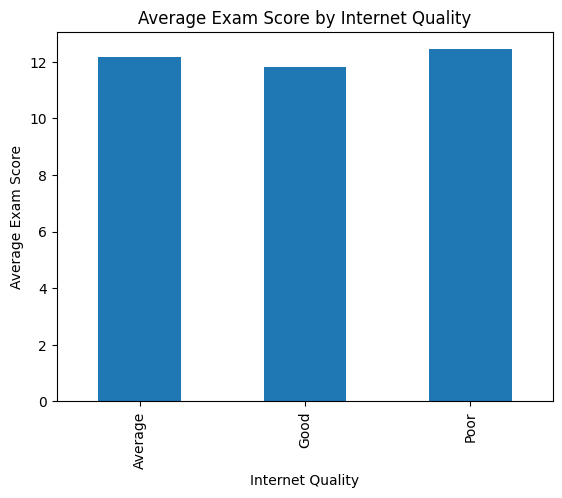

In [53]:
plt.figure()
grouped.plot(kind="bar")
plt.xlabel("Internet Quality")
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Internet Quality")
plt.show()

# Gameing/Social media hours 
 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [47]:
df.groupby("gender")[["gaming_hours","social_media_hours"]].max()

,gaming_hours,social_media_hours
gender,,
Female,5.64,7.97
Male,4.77,8.28
Other,5.51,8.21
